In [1]:
import pandas as pd 
import numpy as np
import joblib
import xgboost as xgb

In [2]:
x_test = pd.read_csv('../data/split/test/x_test.csv',index_col=0)
y_test = pd.read_csv('../data/split/test/y_test.csv',index_col=0)

In [5]:
gb = joblib.load('best_model/gradboost.pkl')

In [6]:
boost = xgb.XGBRegressor()


In [7]:
boost.load_model('best_model/xgboost')

In [9]:
from sklearn.metrics import r2_score

In [11]:
p1 = gb.predict(x_test)
p2 = boost.predict(x_test)

r2_score(y_test,p1),r2_score(y_test,p2)

(0.8580984239661257, 0.8727651513495669)

In [12]:
from scipy import stats
from sklearn.utils import resample

In [ ]:
# confidence interval

In [25]:
X = x_test.copy()
X['target'] = y_test

X.shape

(8253, 335)

In [34]:
conf_dic={}
conf_dic['gb']=[]
conf_dic['xgb']=[]

In [39]:
# for gradient boosting

for i in range(1000):
    
    x = resample(X,replace=True,n_samples=1000)

    xx = x.iloc[:,:-1]
    yy = x.iloc[:,-1]
    
    yhat = gb.predict(xx)
    r2 = r2_score(yy,yhat)
    conf_dic['gb'].append(r2)


In [118]:
'''
for 95% confidence interval and 0.05 alpha


'''
np.percentile(conf_dic['gb'],[2.5,95+0.25])

array([0.82809759, 0.88056454])

In [43]:
np.mean(conf_dic['gb'])

0.8584115325755245

In [110]:
stats.t.interval(.95,len(conf_dic['gb'])-1,
        loc = np.mean(conf_dic['gb']),
                scale = np.std(conf_dic['gb']))

(0.8304593719646391, 0.8863636931864098)

In [115]:
np.mean(conf_dic['gb'])- (stats.norm.isf(0.025) \
            * stats.sem(conf_dic['gb'],ddof=len(conf_dic['gb'])-1) )


0.8304638763203503

In [117]:
np.mean(conf_dic['gb']) + (stats.norm.isf(0.025) \
                * stats.sem(conf_dic['gb'],ddof=len(conf_dic['gb'])-1))



0.8863591888306986

In [ ]:
#formula is
# mean +- Z_criti * sigma/np.sqrt(N)

In [59]:
# for xg boosting

for i in range(1000):
    
    x = resample(X,replace=True,n_samples=1000)

    xx = x.iloc[:,:-1]
    yy = x.iloc[:,-1]
    
    yhat = boost.predict(xx)
    r2 = r2_score(yy,yhat)
    conf_dic['xgb'].append(r2)



In [119]:
'''
for 95% confidence interval and 0.05 alpha


'''
np.percentile(conf_dic['xgb'],[2.5,95+0.25])

array([0.84478542, 0.89374883])

In [62]:
np.mean(conf_dic['xgb'])

0.8729737799473032

In [121]:
stats.t.interval(0.95,len(conf_dic['xgb'])-1,
                 loc = np.mean(conf_dic['xgb']),
                scale =np.std(conf_dic['xgb']) )

(0.8463560076641113, 0.899591552230495)

In [ ]:
# comparing the two models

In [65]:
m1 = np.mean(p1)
m2 = np.mean(p2)

m1,m2

(3.6992831142457736, 3.6968553)

In [ ]:
# H0: both model r equal(m1 =m2)
# Ha : both model r not equal(m1 != m2)
# alpha:0.05
# CI : 95%
# two tail test

In [66]:
stats.ttest_ind(p1,p2,equal_var=False)

Ttest_indResult(statistic=0.39446633107173573, pvalue=0.6932418925543472)

In [132]:
stats.mannwhitneyu(p1,p2)

MannwhitneyuResult(statistic=4403228.0, pvalue=0.8774911871045854)

In [ ]:
# pvalue is bigger than 0.05 we fail to reject the null hypo

In [67]:
# permutation test(Two Tails)

In [75]:
diff = m1-m2
diff

0.002427807620407396

In [73]:
n1 = len(p1)
n2 = len(p2)
n=n1+n2
n1,n2

(8253, 8253)

In [82]:
p = np.concatenate([p1,p2])
p

array([3.71563917, 3.70634682, 4.30515593, ..., 3.15097904, 4.07093143,
       3.38934898])

In [85]:
p[[2,6,-1]]

array([4.30515593, 3.21288119, 3.38934898])

In [95]:
import random
idx = random.sample(range(n),1000)


In [99]:
def permutation_test(p,n1,n2):
    
    n = n1+n2
    idx1 = random.sample(range(n),n1)
    idx2 = list(set(range(n)) - set(idx1))
    
    x = p[idx1]
    xx = p[idx2]
    
    return np.mean(x) - np.mean(xx)    

In [100]:
permutation_test(p,n1,n2)

0.0002198178006307394

In [92]:
'''
h0 : m1 = m2
ha: m1 != m2

alpha=0.05
ci = 95%
two tail test
'''

'\nh0 : m1 = m2\nha: m1 != m2\n\nalpha=0.05\nci = 95%\ntwo tail test\n'

In [101]:
d =[permutation_test(p,n1,n2) for _ in range(1000)]

In [105]:
np.percentile(d,2.5),np.percentile(d,95+2.5)

(-0.012393810048515419, 0.011754012632669883)

In [106]:
import matplotlib.pyplot as plt

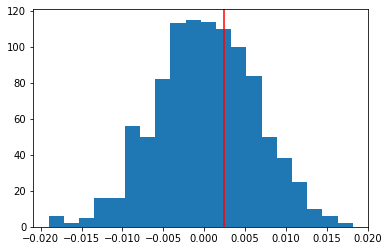

In [108]:
plt.hist(d,bins=20)
plt.axvline(diff,c='r')

In [ ]:
'''
since diff fall within the 2.5% and 97.5% range,we fail to 
reject the null hypo

'''

In [130]:
x_val = pd.read_csv('../data/split/val/x_val.csv',index_col=0)
y_val = pd.read_csv('../data/split/val/y_val.csv',index_col=0)

In [131]:
p1 = gb.predict(x_val)
p2 = boost.predict(x_val)

r2_score(y_val,p1),r2_score(y_val,p2)

(0.8434624004140495, 0.8725145412162132)